# ECG DATASET
Using the above dataset to do survival analyis and find the survival curve.

## BUSINESS OBJECTIVE
* Maximize Survival Rate
* Minimize Complications
* Minimize Death rate

## CONSTRAINTS
* Negligience


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | survival_time_hr | Survival time in hours after the operation | Ratio    | Relevant      |
| 2 | alive | Whether the patient is alive . Here 1 is denoted as dead and 0 as alive which is not correct and will be rectified | Binary    | Relevant      |
| 3| age              | Age in years during operation | Ratio    | Relevant      |
| 4  | pericardialeffusion  | Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid | Binary| Irrelevant     |
| 5 | fractionalshortening|a measure of contracility around the heart lower numbers are increasingly abnormal | Ratio| Irrelevant |
| 6 | epss|E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.| Ratio| Irrelevant  |
| 7        | lvdd           | left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.| Ratio | Irrelevant   |
| 8        | wallmotion-score                 | a measure of how the segments of the left ventricle are moving | Ratio    | Relevant      |
| 9        | wallmotion-index           |  equals wall-motion-score divided by number of segments seen| Ratio | Irrelevant       |
| 10       | multi_sensor               | A derivative variable which can be ignored| Ratio   | Irrelevant      |
| 11       | name                 | Name of each patient but the names were not given so removed it | Nominal   | Irrelevant       |
| 12       | group                | Different patient groups: '1','2' & '3' | Nominal   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
import lifelines

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_excel(r"D:\360Digitmg\ASSIGNMENTS\Ass27\ECG_Surv.xlsx")
df=df0.copy()
df.head()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,name,group
0,11.0,0,71,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1
1,19.0,0,72,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1
2,16.0,0,55,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1
3,57.0,0,60,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1
4,19.0,1,57,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(133, 12)

In [4]:
df.dtypes

survival_time_hr        float64
alive                     int64
age                       int64
pericardialeffusion       int64
fractionalshortening    float64
epss                    float64
lvdd                    float64
wallmotion-score        float64
wallmotion-index        float64
multi_sensor            float64
name                     object
group                     int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival_time_hr      133 non-null    float64
 1   alive                 133 non-null    int64  
 2   age                   133 non-null    int64  
 3   pericardialeffusion   133 non-null    int64  
 4   fractionalshortening  133 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   multi_sensor          129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 133 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 12.6+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,117.000000,121.000000,128.000000,130.00000,129.000000,133.000000
mean,21.795338,0.383459,62.413534,0.187970,0.228534,12.164769,4.763157,14.438125,1.37800,0.786202,1.984962
std,15.885313,0.488067,9.335601,0.392165,0.135864,7.370159,0.810013,5.018566,0.45185,0.225661,0.590133
min,0.030000,0.000000,23.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000
25%,6.000000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,2.000000
50%,22.000000,0.000000,62.000000,0.000000,0.217000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000
75%,33.000000,1.000000,68.000000,0.000000,0.280000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000
max,57.000000,1.000000,86.000000,1.000000,0.840000,40.000000,6.780000,39.000000,3.00000,2.000000,3.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 epss                    16
lvdd                    12
wallmotion-score         5
multi_sensor             4
wallmotion-index         3
name                     2
survival_time_hr         0
alive                    0
age                      0
pericardialeffusion      0
fractionalshortening     0
group                    0
dtype: int64


Importing the library to impute the missing values. 

In [9]:
from sklearn.impute import SimpleImputer

Using the mean imputer to replace the missing values. 

In [10]:
mean_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df[['multi_sensor', 'epss', 'lvdd', 'wallmotion-score','wallmotion-index']]=pd.DataFrame(mean_imputer.fit_transform(df[['multi_sensor', 'epss', 'lvdd', 'wallmotion-score','wallmotion-index']]))
df.isnull().sum()

survival_time_hr        0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
multi_sensor            0
name                    2
group                   0
dtype: int64

In [11]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 survival_time_hr        54
alive                    2
age                     39
pericardialeffusion      2
fractionalshortening    55
epss                    83
lvdd                    95
wallmotion-score        46
wallmotion-index        60
multi_sensor            28
name                     1
group                    3
dtype: int64


Droping the columns which has just one value throughout. 

In [12]:
df.drop(['name'],axis=1,inplace=True)
df.head()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
0,11.0,0,71,0,0.260,9.000,4.600,14.0,1.00,1.000,1
1,19.0,0,72,0,0.380,6.000,4.100,14.0,1.70,0.588,1
2,16.0,0,55,0,0.260,4.000,3.420,14.0,1.00,1.000,1
3,57.0,0,60,0,0.253,12.062,4.603,16.0,1.45,0.788,1
4,19.0,1,57,0,0.160,22.000,5.750,18.0,2.25,0.571,1


Interchanging the values in the alive column as '1' was denoting death.  

In [13]:
df["alive"] = np.where(df["alive"] == 1, 0, 1)
df.head()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
0,11.0,1,71,0,0.260,9.000,4.600,14.0,1.00,1.000,1
1,19.0,1,72,0,0.380,6.000,4.100,14.0,1.70,0.588,1
2,16.0,1,55,0,0.260,4.000,3.420,14.0,1.00,1.000,1
3,57.0,1,60,0,0.253,12.062,4.603,16.0,1.45,0.788,1
4,19.0,0,57,0,0.160,22.000,5.750,18.0,2.25,0.571,1


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [14]:
df.mean()

survival_time_hr        21.795338
alive                    0.616541
age                     62.413534
pericardialeffusion      0.187970
fractionalshortening     0.228534
epss                    12.164769
lvdd                     4.763157
wallmotion-score        14.438125
wallmotion-index         1.378000
multi_sensor             0.786202
group                    1.984962
dtype: float64

In [15]:
df.median()

survival_time_hr        22.000
alive                    1.000
age                     62.000
pericardialeffusion      0.000
fractionalshortening     0.217
epss                    12.000
lvdd                     4.750
wallmotion-score        14.000
wallmotion-index         1.230
multi_sensor             0.786
group                    2.000
dtype: float64

In [16]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_29684\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[ 0.5       ,  1.        , 62.        ,  0.        ,  0.15      ,
        12.16476923,  4.76315702, 14.        ,  1.        ,  0.857     ,
         2.        ]]), count=array([[  6,  82,  10, 108,   8,  16,  12,  21,  42,  29,  87]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [17]:
df.var()

survival_time_hr        252.343163
alive                     0.238209
age                      87.153452
pericardialeffusion       0.153794
fractionalshortening      0.018459
epss                     47.735099
lvdd                      0.596474
wallmotion-score         24.231994
wallmotion-index          0.199528
multi_sensor              0.049380
group                     0.348257
dtype: float64

In [18]:
df.std()

survival_time_hr        15.885313
alive                    0.488067
age                      9.335601
pericardialeffusion      0.392165
fractionalshortening     0.135864
epss                     6.909059
lvdd                     0.772317
wallmotion-score         4.922600
wallmotion-index         0.446686
multi_sensor             0.222215
group                    0.590133
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [19]:
df.skew()

survival_time_hr        0.211713
alive                  -0.484854
age                    -0.575366
pericardialeffusion     1.615614
fractionalshortening    1.510182
epss                    1.029598
lvdd                    0.213878
wallmotion-score        1.317182
wallmotion-index        1.438234
multi_sensor            1.928545
group                   0.002780
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [20]:
df.kurt()

survival_time_hr        -0.926895
alive                   -1.792096
age                      2.641063
pericardialeffusion      0.619296
fractionalshortening     4.068751
epss                     1.930595
lvdd                     0.575116
wallmotion-score         4.436167
wallmotion-index         1.753096
multi_sensor            12.656696
group                   -0.066244
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

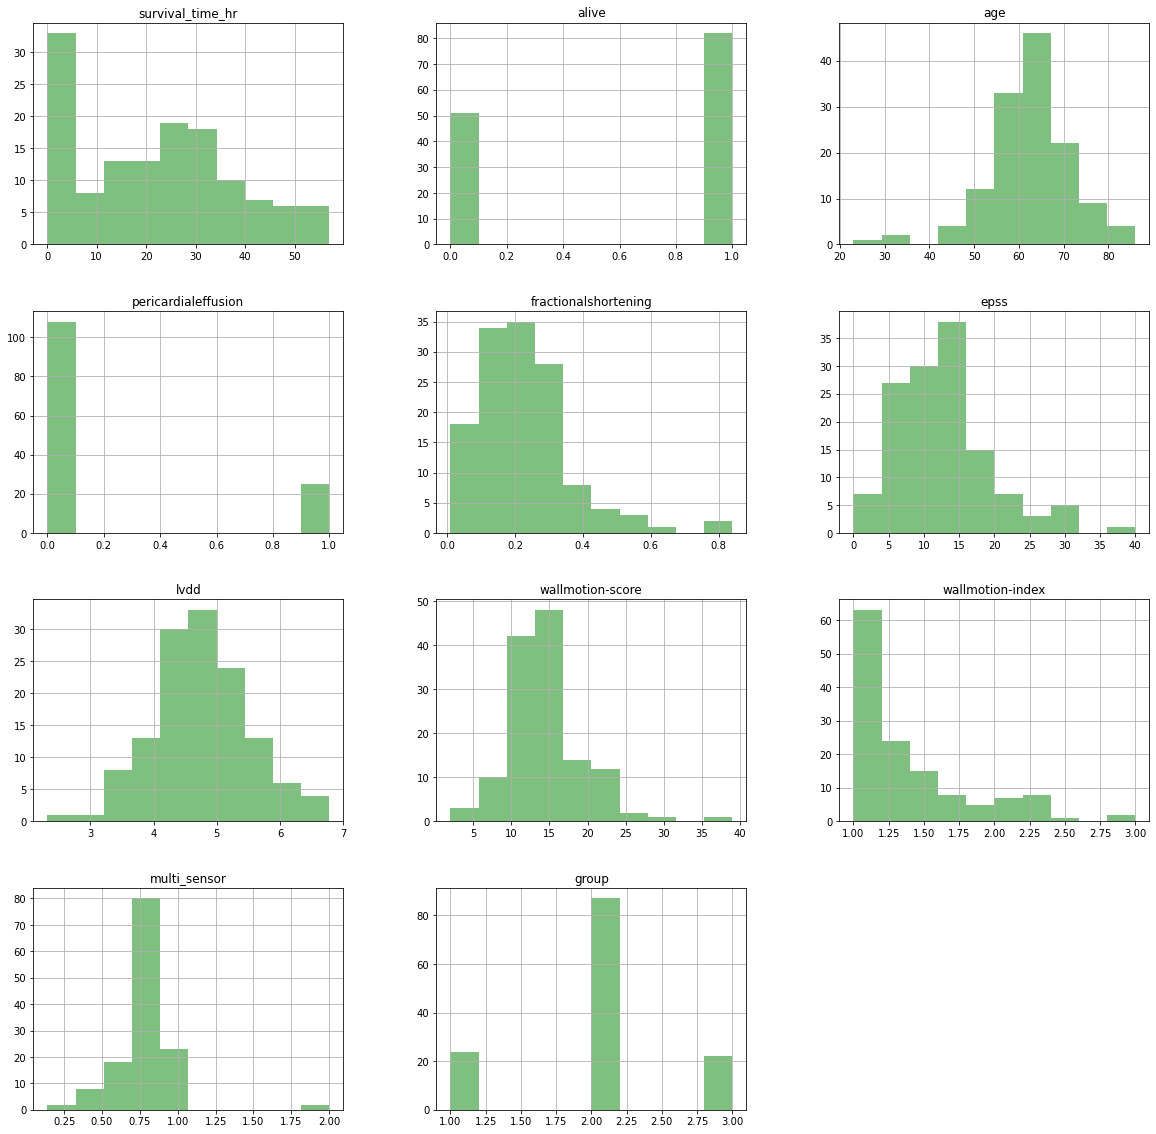

In [21]:
df.hist(alpha=0.5, figsize=(20, 20), color='green')
plt.show()

Plotting the pairplots. 

<Figure size 432x288 with 0 Axes>

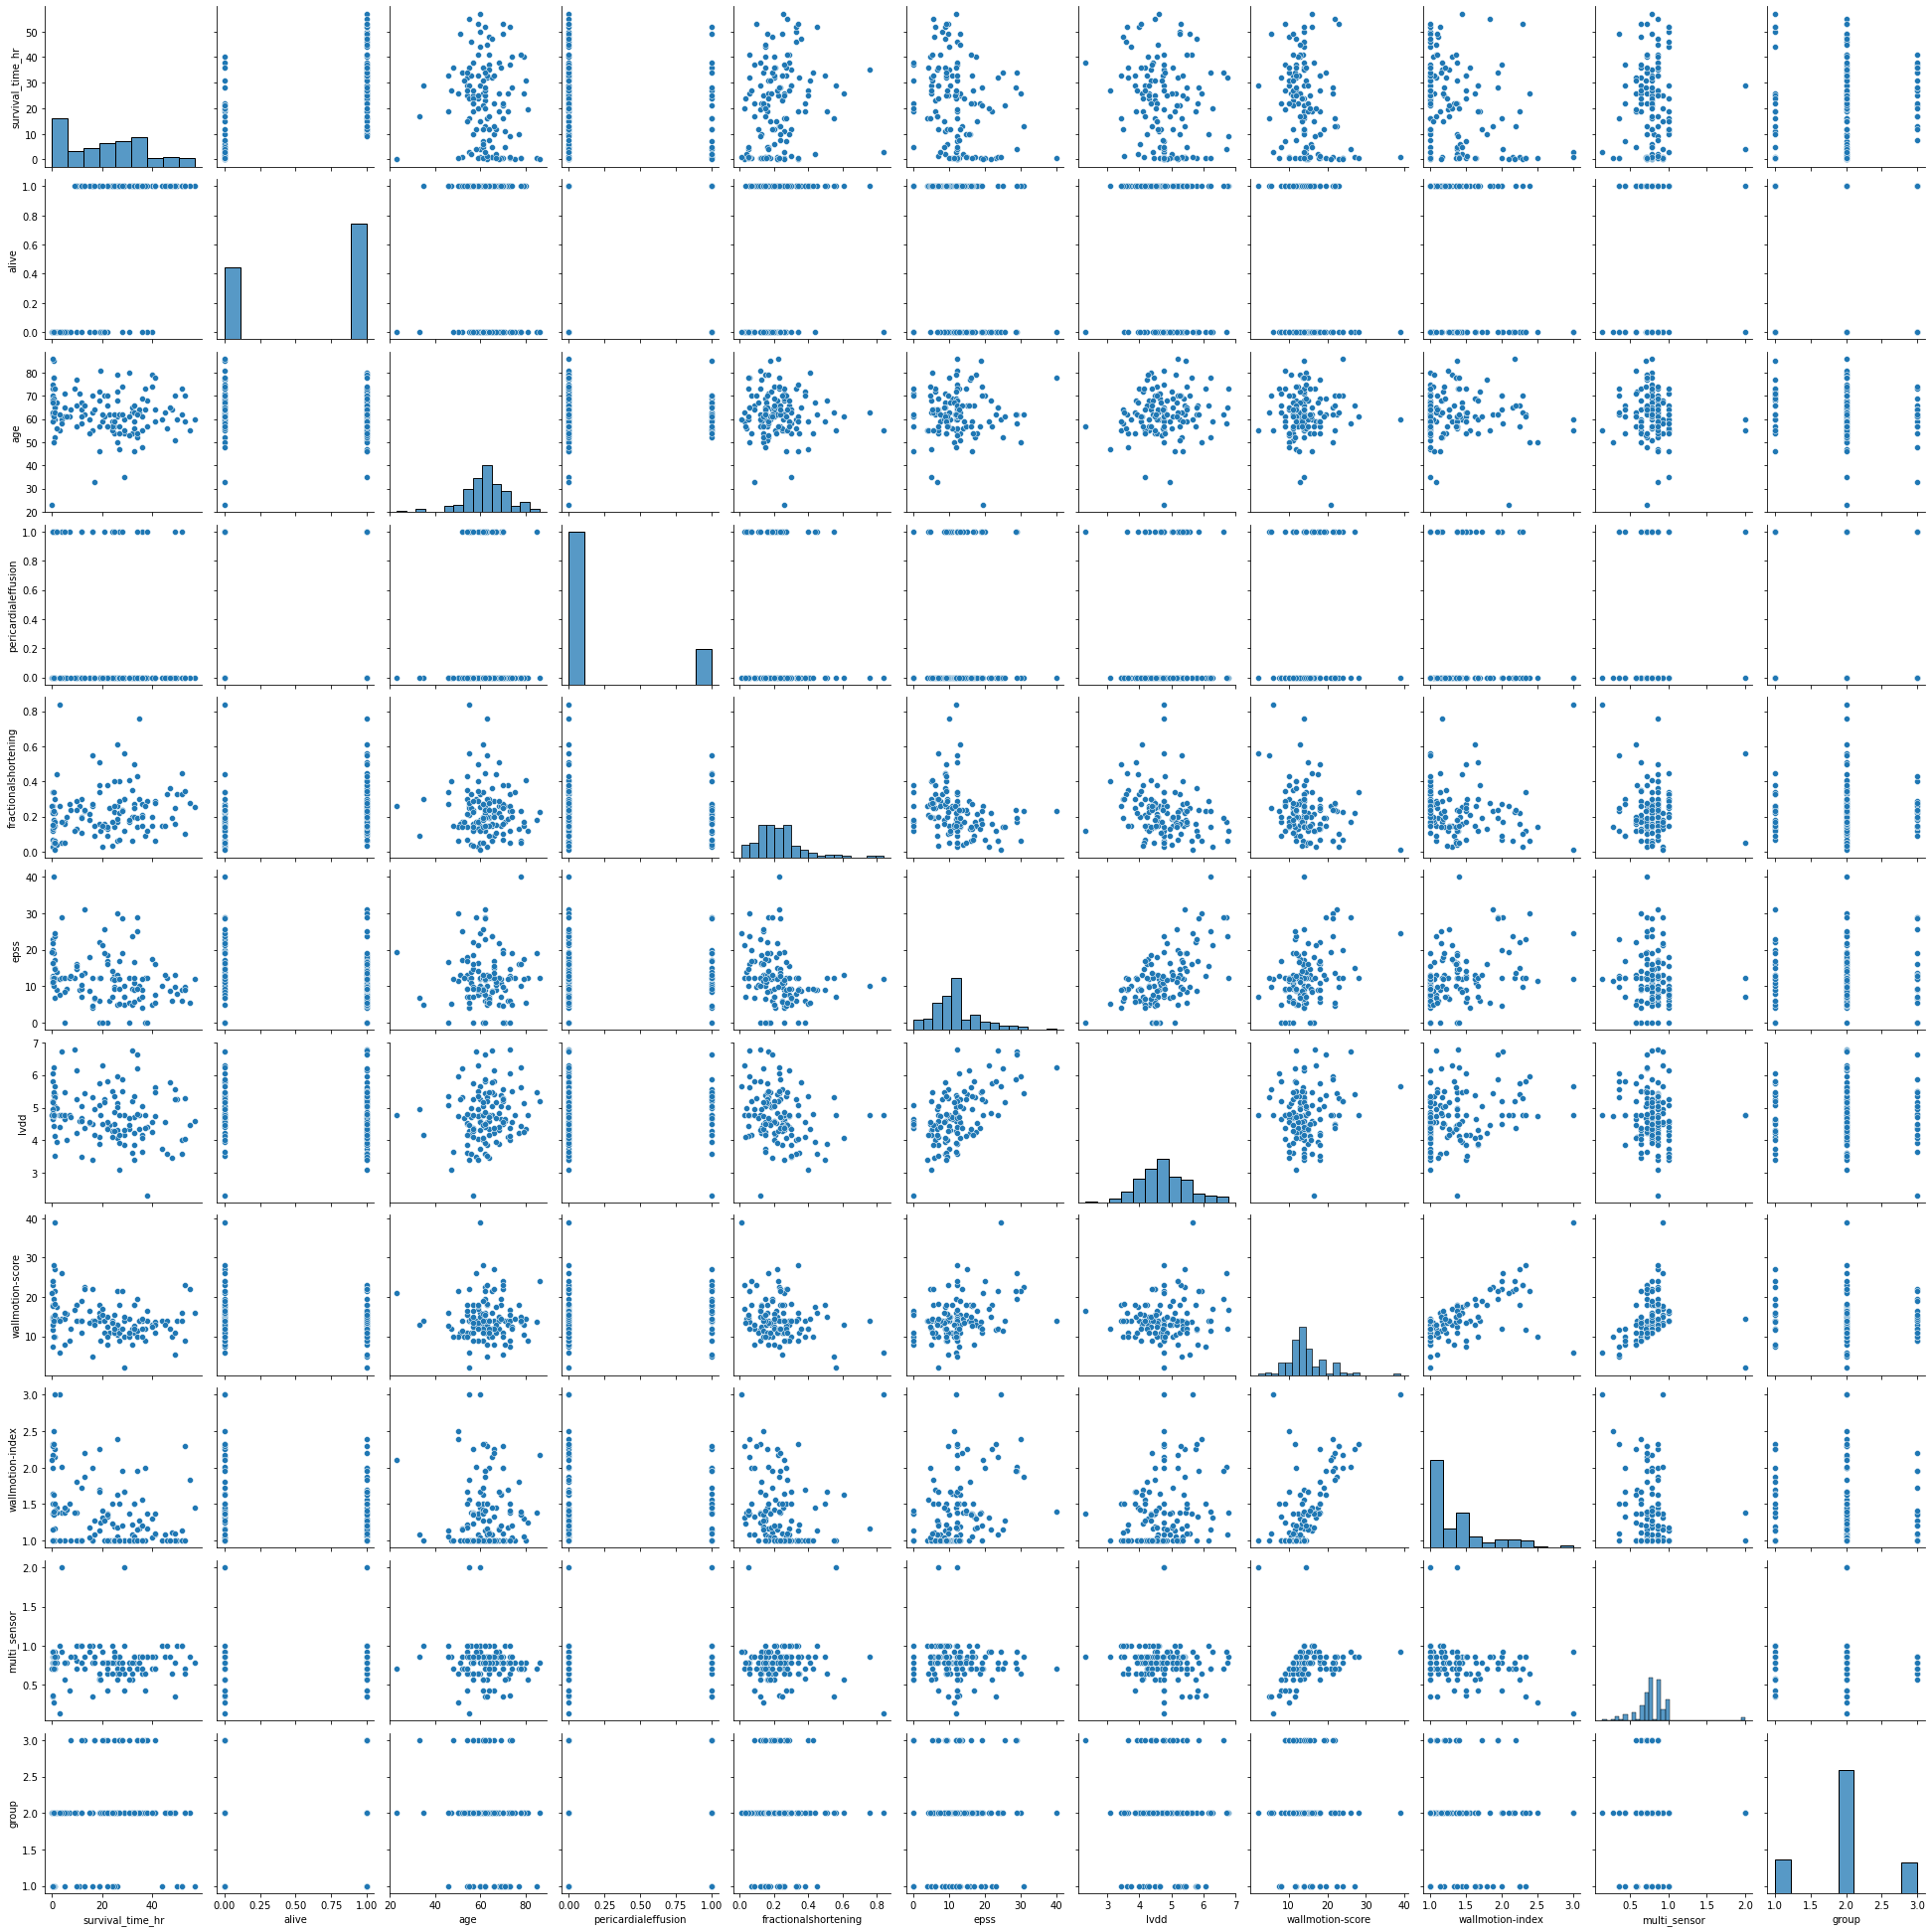

In [22]:
plt.figure()
sns.pairplot(df)
plt.show()

Plotting boxplot for survival_time_hr column. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survival_time_hr'>

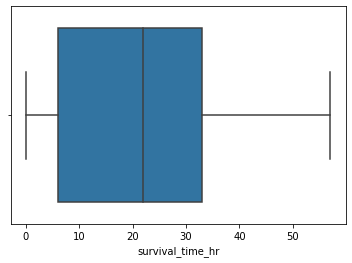

In [23]:
sns.boxplot(df["survival_time_hr"])

From the boxplot it is clear that there are no outliers. 

The variable survival_time_hr refers to the time and assigned to 'T' while the dead variable is the event and assigned to 'E'

In [24]:
T = df.survival_time_hr
E = df.alive

### MODEL BUILDING

Importing the KaplanMeierFitter model to fit the survival analysis

In [25]:
from lifelines import KaplanMeierFitter

Initiating the KaplanMeierFitter model

In [26]:
kmf = KaplanMeierFitter()

Fitting KaplanMeierFitter model on Time and Events for death 

In [27]:
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 133 total observations, 51 right-censored observations>

Time-line estimations plot 

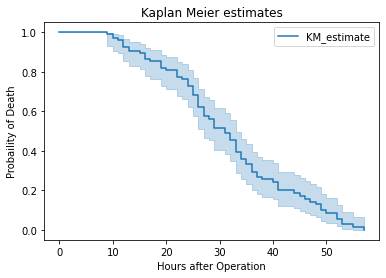

In [28]:
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("Hours after Operation")
plt.ylabel("Probaility of Death")
plt.show()

From the above time-line plot we can understand that the chances of death is very high immediately after operation and it reduces with increase in time.

In [29]:
print("The median survival time :",kmf.median_survival_time_)

The median survival time : 31.0


Given below is the KM_estimate that gives the probability of death after the operation.

In [30]:
print(kmf.survival_function_)

          KM_estimate
timeline             
0.00         1.000000
0.03         1.000000
0.25         1.000000
0.50         1.000000
0.75         1.000000
1.00         1.000000
1.25         1.000000
2.00         1.000000
3.00         1.000000
4.00         1.000000
5.00         1.000000
6.00         1.000000
7.00         1.000000
7.50         1.000000
9.00         0.989691
10.00        0.969072
11.00        0.958652
12.00        0.927392
13.00        0.906315
15.00        0.895776
16.00        0.863784
17.00        0.853120
19.00        0.820723
19.50        0.820723
20.00        0.809632
21.00        0.809632
22.00        0.774934
23.00        0.763192
24.00        0.727968
25.00        0.681002
26.00        0.622295
27.00        0.575330
28.00        0.563588
29.00        0.515623
31.00        0.491641
32.00        0.454768
33.00        0.393313
34.00        0.356440
35.00        0.331857
36.00        0.294984
37.00        0.269334
38.00        0.256508
40.00        0.243008
41.00     

__Over Multiple Groups__

For each group the value counts 

In [31]:
df.group.value_counts()

2    87
1    24
3    22
Name: group, dtype: int64

__Kaplan Meier estimates by Patient groups__

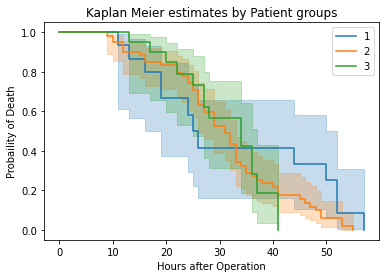

In [32]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for group in df['group'].unique():
    
    flag = df['group'] == group
    
    kmf.fit(T[flag], event_observed = E[flag], label = group)
    kmf.plot(ax=ax)

plt.title("Kaplan Meier estimates by Patient groups");
plt.xlabel("Hours after Operation")
plt.ylabel("Probaility of Death")
plt.show()

There is a significant difference between the groups '1' & '3' but the group '2' is similar to group '3'

__Kaplan Meier estimates by age group__

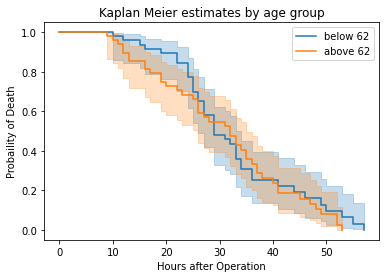

In [33]:
age_group = df['age'] < 62
ax = plt.subplot(111)
kmf.fit(T[age_group], event_observed = E[age_group], label = 'below 62')
kmf.plot(ax = ax)
kmf.fit(T[~age_group], event_observed = E[~age_group], label = 'above 62')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by age group")
plt.xlabel("Hours after Operation")
plt.ylabel("Probaility of Death")
plt.show()

There is no significant difference between the two age groups. 

__Kaplan Meier estimamtes by wallmotion-score group__

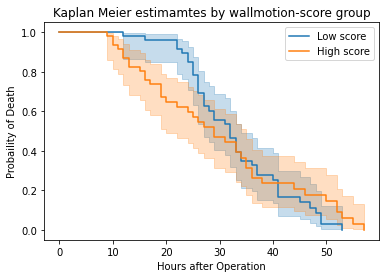

In [34]:
score_group = df['wallmotion-score'] < 14
ax = plt.subplot(111)
kmf.fit(T[score_group], event_observed = E[score_group], label = 'Low score')
kmf.plot(ax = ax)
kmf.fit(T[~score_group], event_observed = E[~score_group], label = 'High score')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimamtes by wallmotion-score group")
plt.xlabel("Hours after Operation")
plt.ylabel("Probaility of Death")
plt.show()

There is some difference initially upto around 25hrs but after that both follow the same path. 

### CONCLUSION

The survival analysis helped us to determine distributions given the Kaplan survival plots. Further, we researched on the survival rate of different age groups, patient groups and wallmotion score groups following the operation.